In [3]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from pysal.model import mgwr

from pysal.explore.esda.moran  import Moran
#
from libpysal.weights import Queen, Rook, KNN

import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

import osmnx as ox
from shapely.geometry import Point
import geopandas as gpd
import overpy
from shapely.geometry import shape
from shapely.geometry import Polygon
import folium
from folium import Choropleth, Circle, Marker, CircleMarker
from folium.plugins import HeatMap, MarkerCluster

import osmnx as ox

import networkx as nx
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.cm as cm

%matplotlib inline
import matplotlib.colors as mcolors
import warnings
warnings.simplefilter("ignore")
from sklearn.linear_model import LinearRegression as LR
import contextily as ctx

import mplleaflet

from sklearn.metrics import r2_score

import h3

import shapely.wkt

from sklearn.preprocessing import StandardScaler

import contextily as ctx
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.cluster import KMeans
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

C:\Users\Intra24\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\Intra24\Anaconda3\lib\site-packages\pysal\explore\segregation\network\network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
C:\Users\Intra24\Anaconda3\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [ ]:
# !pip install -q wordcloud
import wordcloud

In [41]:
from sklearn.cluster import DBSCAN

In [37]:
def get_hex_buffer(df):
    df['hex_buffer']=df['HEX GID'].apply(lambda x: Polygon(h3.h3_to_geo_boundary(x, True)))

In [38]:
df_model=gpd.read_file('loco_geodata.shp')

In [12]:
df_model['Time Inter'].unique()

array(['Workdays_09-21', 'Weekends_09-21'], dtype=object)

In [15]:
get_hex_buffer(df_model)

In [316]:
df_model['Audience P'].unique()

array(['Non-residents', 'Non-residents signals', 'Residents',
       'Residents signals', 'Signals', 'Users', 'Visitors',
       'Visitors signals', 'Workers', 'Workers signals',
       'Active youth interest 2.4', 'Families interest 2.4',
       'Fast food interest 2.4', 'Hardworkers interest 2.4',
       'Healthy lifestile interest 2.4', 'Rich men interest 2.4',
       'Sport and fitness interest 2.4', 'Travellers interest 2.4',
       'Women 18-35 interest 2.4', 'Shopping addicted interest 2.4'],
      dtype=object)

In [317]:
cols_int=['Active youth interest 2.4', 'Families interest 2.4',
       'Fast food interest 2.4', 'Hardworkers interest 2.4',
       'Healthy lifestile interest 2.4', 'Rich men interest 2.4',
       'Sport and fitness interest 2.4', 'Travellers interest 2.4',
       'Women 18-35 interest 2.4']

In [26]:
df_model[df_model['year']=='2019'].shape

(4187040, 13)

In [39]:
df_model['season']=df_model['Month'].apply(lambda x: int(x.split('_')[1])%12//3)

df_model['year']=df_model['Month'].apply(lambda x: x.split('_')[0])

In [40]:
df_pt=pd.pivot_table(data=df_model[df_model['year']=='2019'],index=['HEX GID'], columns=['season','Audience P','Time Inter'],values='Per Polygo', aggfunc='mean' )

In [41]:
new_cols=['s'+str(v[0])+'_'+v[1]+'_'+v[2] for v in df_pt.columns.tolist()]

In [42]:
df_pt.columns=new_cols

In [43]:
df_normal=df_pt.join(df_model.groupby('HEX GID')['HEX Lat','HEX Long'].min())

In [44]:
df_normal=df_normal[[ i for i in df_normal.columns if 'signal' not in i]]

In [301]:
df_normal.head()

,s0_Active youth interest 2.4_Weekends_09-21,s0_Active youth interest 2.4_Workdays_09-21,s0_Families interest 2.4_Weekends_09-21,s0_Families interest 2.4_Workdays_09-21,s0_Fast food interest 2.4_Weekends_09-21,s0_Fast food interest 2.4_Workdays_09-21,s0_Hardworkers interest 2.4_Weekends_09-21,s0_Hardworkers interest 2.4_Workdays_09-21,s0_Healthy lifestile interest 2.4_Weekends_09-21,s0_Healthy lifestile interest 2.4_Workdays_09-21,...,s3_Users_Weekends_09-21,s3_Users_Workdays_09-21,s3_Visitors_Weekends_09-21,s3_Visitors_Workdays_09-21,s3_Women 18-35 interest 2.4_Weekends_09-21,s3_Women 18-35 interest 2.4_Workdays_09-21,s3_Workers_Weekends_09-21,s3_Workers_Workdays_09-21,HEX Lat,HEX Long
HEX GID,,,,,,,,,,,,,,,,,,,,,
891181b4183ffff,9.231798,8.687452,10.844546,10.376645,12.165695,12.031786,6.910711,6.559234,6.018908,5.668211,...,39.000000,76.666667,30.000000,57.333333,10.125115,9.400380,0.0,0.0,55.585938,37.710978
891181b4187ffff,3.806555,4.259855,7.386098,8.704605,4.554173,6.728690,5.257044,1.518989,2.845223,3.641684,...,0.000000,1.666667,0.000000,1.333333,0.000000,9.833581,0.0,0.0,55.588512,37.714101
891181b4193ffff,6.965970,5.034297,5.553501,7.631014,4.911782,7.076999,15.197724,6.849961,4.028486,3.493321,...,1.000000,1.000000,0.333333,0.666667,7.075783,7.695853,0.0,0.0,55.586240,37.705847
891181b4197ffff,5.311990,2.617954,7.437264,3.209709,6.026788,2.899028,6.144599,2.692195,3.841686,1.974606,...,0.333333,0.666667,0.333333,0.333333,2.987066,3.150707,0.0,0.0,55.588814,37.708970
891181b41a3ffff,8.148081,7.578621,11.197036,11.364495,11.867558,12.578100,6.803656,5.427340,5.329739,5.510168,...,46.000000,105.333333,29.666667,73.333333,9.805548,9.405268,0.0,0.0,55.590783,37.722357


In [45]:
# from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

In [46]:
df_norm_stand=ss.fit_transform(df_normal)

In [78]:
df_norm_stand

array([[ 0.1884477 ,  0.0160021 ,  0.02956692, ..., -1.90009457,
         0.82081436, -0.55337999],
       [-0.85515132, -0.68989829,  0.18239334, ..., -1.86930259,
         0.84701286,  1.80707655],
       [ 0.46767964, -0.32799086, -0.64998746, ..., -1.89647671,
         0.77777337,  1.80707655],
       ...,
       [ 0.28165034,  0.36189664,  0.13939326, ..., -1.15003282,
        -1.07603692, -0.55337999],
       [ 0.45889996,  0.26981433, -0.02629466, ..., -1.11919656,
        -1.04996612, -0.55337999],
       [-0.15862275, -0.213942  ,  0.71285227, ..., -1.18435626,
        -1.05906713, -0.55337999]])

In [59]:
df_normal.reset_index(inplace=True)

get_hex_buffer(df_normal)

In [257]:
gdf_normal=gpd.GeoDataFrame(df_normal, crs='epsg:4326',geometry='hex_buffer')

In [258]:
# ax=plt.figure(figsize=(12,16))
# gdf_normal.plot(column='cluster', figsize=(15,12) )

In [47]:
from sklearn.cluster import KMeans

In [48]:
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [49]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_norm_stand)
    distortions.append(kmeanModel.inertia_)

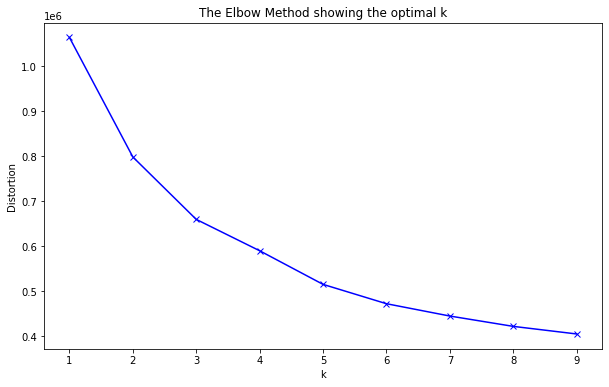

In [50]:
plt.figure(figsize=(10,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [51]:
n=5

In [52]:
kmeans_1 = KMeans(n_clusters=n,random_state= 10)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(df_norm_stand)
# Calculate cluster validation metrics
score_kemans_s = silhouette_score(df_norm_stand, kmeans_1.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(df_norm_stand, kmeans_1.labels_)
score_kemans_d = davies_bouldin_score(df_norm_stand, predictions)
print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)

Silhouette Score: 0.2096
Calinski Harabasz Score: 2321.3795
Davies Bouldin Score: 1.1633


In [53]:
df_normal['cluster_k']=predictions

In [55]:
df_normal['cluster_k'].value_counts()

1    5034
3    2276
0    1099
2     313
4       1
Name: cluster_k, dtype: int64

In [60]:
gdf_normal=gpd.GeoDataFrame(df_normal, crs='epsg:4326',geometry='hex_buffer')

<AxesSubplot:>

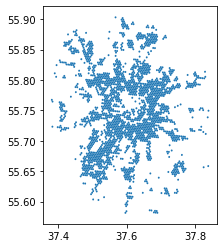

In [61]:
gdf_normal[df_normal['cluster_k']==3].plot()

In [205]:
gdf_normal['cluster_k_st']=gdf_normal['cluster_k'].astype(str)
                                                         

Text(0.5, 1.0, 'Clusters formed by people behavior')

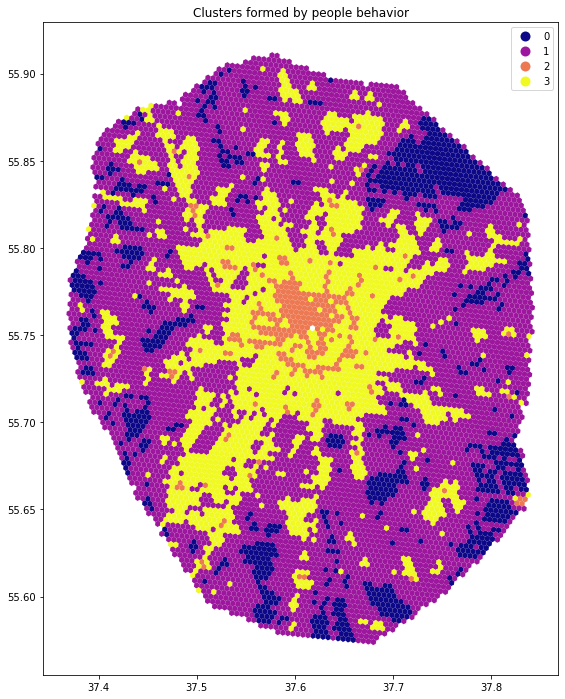

In [652]:
gdf_normal[gdf_normal['cluster_k_st']!='4'].plot(column='cluster_k_st', figsize=(15,12), legend=True, cmap='plasma' )
plt.title('Clusters formed by people behavior')

In [143]:
from sklearn.decomposition import PCA

In [144]:
pca=PCA(n_components=5)

In [184]:
df_normal[['pca1','pca2','pca3','pca4','pca5']]=pca.fit_transform(df_norm_stand)

In [ ]:
pca1 _

s0_Non-residents_Workdays_09-21    0.841452
s1_Non-residents_Workdays_09-21    0.844835
s1_Signals_Workdays_09-21          0.841955
s1_Users_Workdays_09-21            0.844049
s2_Non-residents_Workdays_09-21    0.843229
s2_Users_Workdays_09-21            0.841258
s3_Signals_Workdays_09-21

In [185]:
cor_pca1=df_normal.corr()['pca1']
cor_pca1[cor_pca1>0.84]

s0_Non-residents_Workdays_09-21    0.841452
s1_Non-residents_Workdays_09-21    0.844835
s1_Signals_Workdays_09-21          0.841955
s1_Users_Workdays_09-21            0.844049
s2_Non-residents_Workdays_09-21    0.843229
s2_Users_Workdays_09-21            0.841258
s3_Signals_Workdays_09-21          0.841856
pca1                               1.000000
Name: pca1, dtype: float64

In [191]:
cor_pca2=df_normal.corr()['pca2']
cor_pca2[cor_pca2>0.45]

s0_Signals_Weekends_09-21          0.454184
s0_Users_Weekends_09-21            0.477981
s0_Visitors_Weekends_09-21         0.511745
s0_Visitors_Workdays_09-21         0.456179
s1_Non-residents_Weekends_09-21    0.455305
s1_Signals_Weekends_09-21          0.480517
s1_Users_Weekends_09-21            0.482875
s1_Visitors_Weekends_09-21         0.502165
s2_Non-residents_Weekends_09-21    0.489215
s2_Signals_Weekends_09-21          0.507389
s2_Signals_Workdays_09-21          0.460468
s2_Users_Weekends_09-21            0.515632
s2_Users_Workdays_09-21            0.457956
s2_Visitors_Weekends_09-21         0.527461
s2_Visitors_Workdays_09-21         0.477220
s2_Workers_Weekends_09-21          0.476321
s2_Workers_Workdays_09-21          0.474470
s3_Non-residents_Weekends_09-21    0.541546
s3_Non-residents_Workdays_09-21    0.468397
s3_Signals_Weekends_09-21          0.531568
s3_Users_Weekends_09-21            0.568629
s3_Users_Workdays_09-21            0.498126
s3_Visitors_Weekends_09-21      

In [192]:
cor_pca3=df_normal.corr()['pca3']
cor_pca3[cor_pca3>0.45]

s0_Residents_Weekends_09-21    0.576965
s0_Residents_Workdays_09-21    0.574119
s1_Residents_Weekends_09-21    0.660939
s1_Residents_Workdays_09-21    0.662772
s2_Residents_Weekends_09-21    0.724677
s2_Residents_Workdays_09-21    0.727540
s2_Workers_Weekends_09-21      0.593970
s2_Workers_Workdays_09-21      0.588553
s3_Residents_Weekends_09-21    0.761189
s3_Residents_Workdays_09-21    0.762242
s3_Workers_Weekends_09-21      0.599001
s3_Workers_Workdays_09-21      0.594705
s4_Residents_Weekends_09-21    0.699636
s4_Residents_Workdays_09-21    0.697472
s4_Workers_Weekends_09-21      0.599880
s4_Workers_Workdays_09-21      0.597836
pca3                           1.000000
Name: pca3, dtype: float64

In [195]:
cor_pca4=df_normal.corr()['pca4']
cor_pca4[cor_pca4>0.15]

s0_Active youth interest 2.4_Workdays_09-21         0.177981
s0_Hardworkers interest 2.4_Weekends_09-21          0.242659
s0_Hardworkers interest 2.4_Workdays_09-21          0.308860
s0_Healthy lifestile interest 2.4_Workdays_09-21    0.160670
s0_Rich men interest 2.4_Weekends_09-21             0.214752
s0_Rich men interest 2.4_Workdays_09-21             0.253853
s0_Travellers interest 2.4_Workdays_09-21           0.194010
s0_Women 18-35 interest 2.4_Workdays_09-21          0.171326
s1_Hardworkers interest 2.4_Weekends_09-21          0.211338
s1_Hardworkers interest 2.4_Workdays_09-21          0.281853
s1_Rich men interest 2.4_Weekends_09-21             0.195515
s1_Rich men interest 2.4_Workdays_09-21             0.239839
s1_Travellers interest 2.4_Workdays_09-21           0.162004
s2_Hardworkers interest 2.4_Weekends_09-21          0.188551
s2_Hardworkers interest 2.4_Workdays_09-21          0.266401
s2_Rich men interest 2.4_Weekends_09-21             0.191330
s2_Rich men interest 2.4

In [194]:
pd.qcut(cor_pca4,5)

s0_Active youth interest 2.4_Weekends_09-21        (0.0611, 0.14]
s0_Active youth interest 2.4_Workdays_09-21           (0.14, 1.0]
s0_Families interest 2.4_Weekends_09-21          (-0.457, -0.163]
s0_Families interest 2.4_Workdays_09-21          (-0.457, -0.163]
s0_Fast food interest 2.4_Weekends_09-21         (-0.457, -0.163]
                                                      ...        
pca1                                           (-0.00193, 0.0611]
pca2                                           (-0.00193, 0.0611]
pca3                                           (-0.00193, 0.0611]
pca4                                                  (0.14, 1.0]
pca5                                           (-0.00193, 0.0611]
Name: pca4, Length: 169, dtype: category
Categories (5, interval[float64]): [(-0.457, -0.163] < (-0.163, -0.00193] < (-0.00193, 0.0611] < (0.0611, 0.14] < (0.14, 1.0]]

In [62]:
int_cols=[ i for i  in df_normal.columns if 'interest' in i]

In [342]:
# for k in df_normal['cluster_k'].unique():
#     print(k)
#     df_normal[(df_normal['cluster_k']==k)][[i for i in int_cols if 's1' in i]].mean().plot(kind='barh', figsize=(15,15))
#     plt.show()

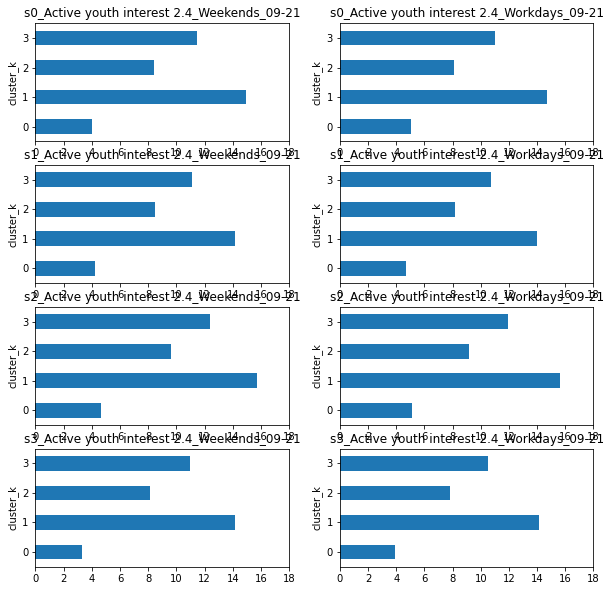

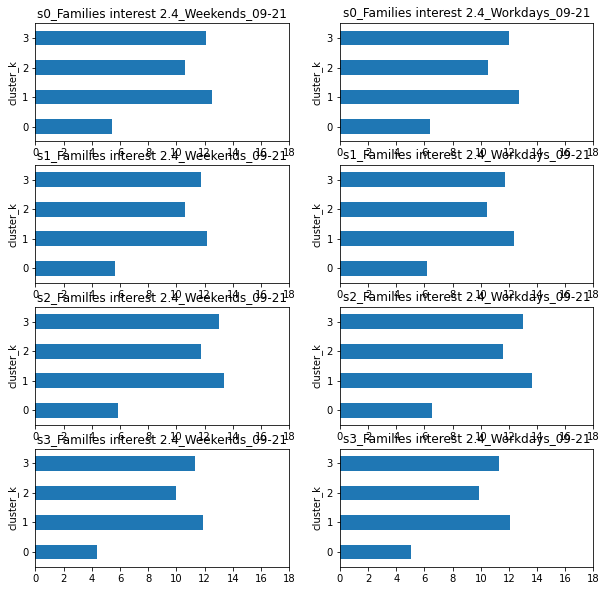

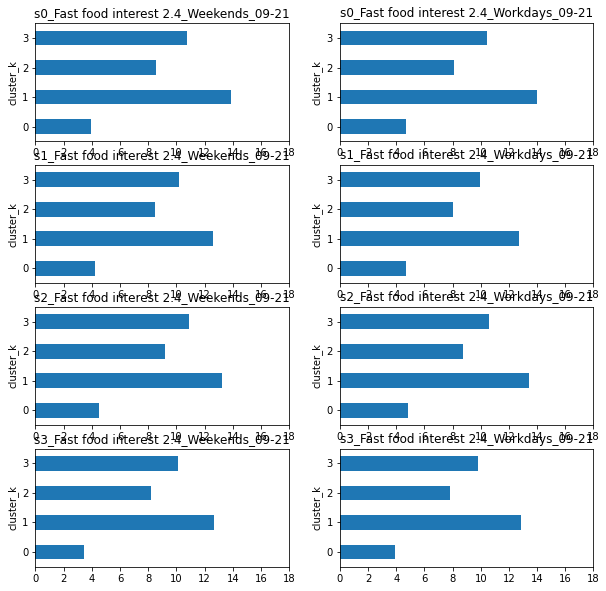

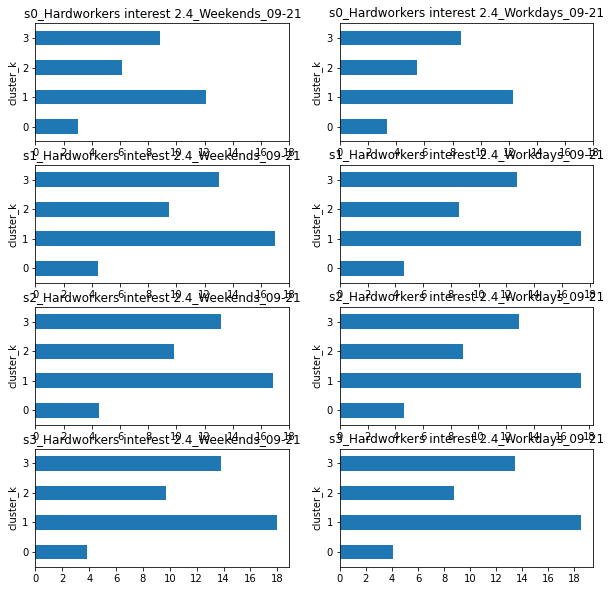

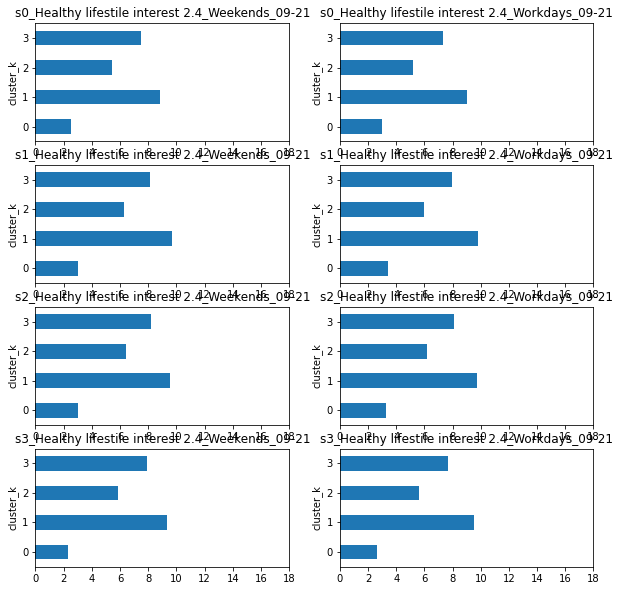

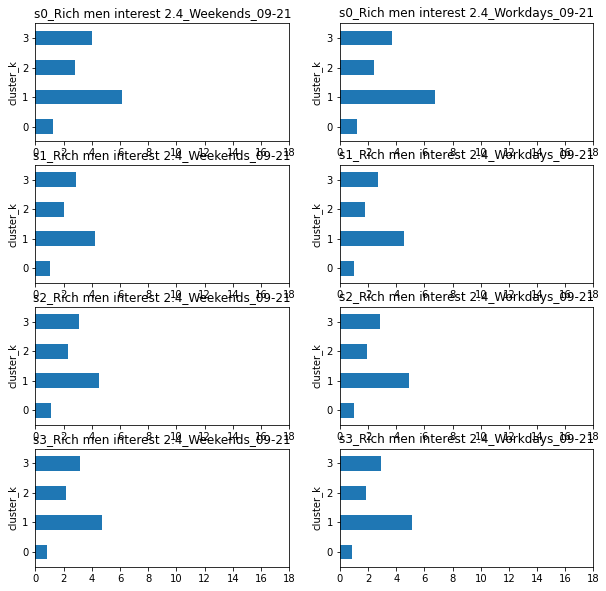

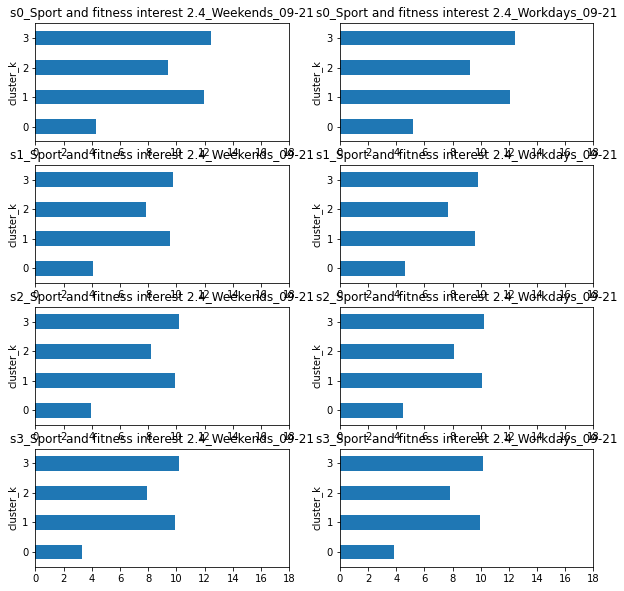

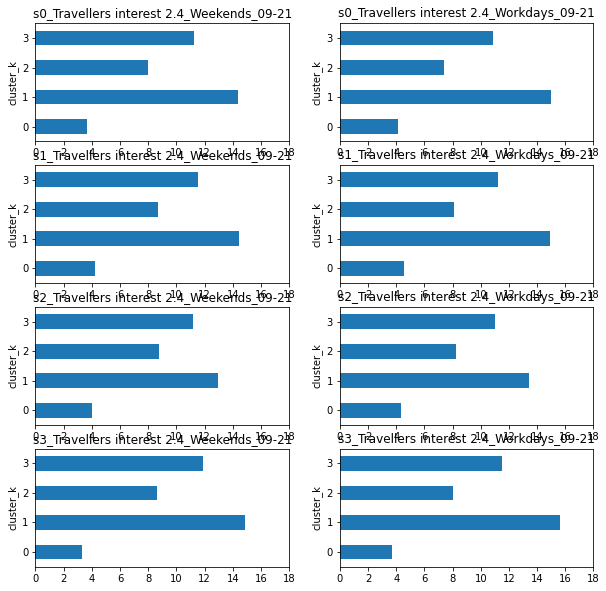

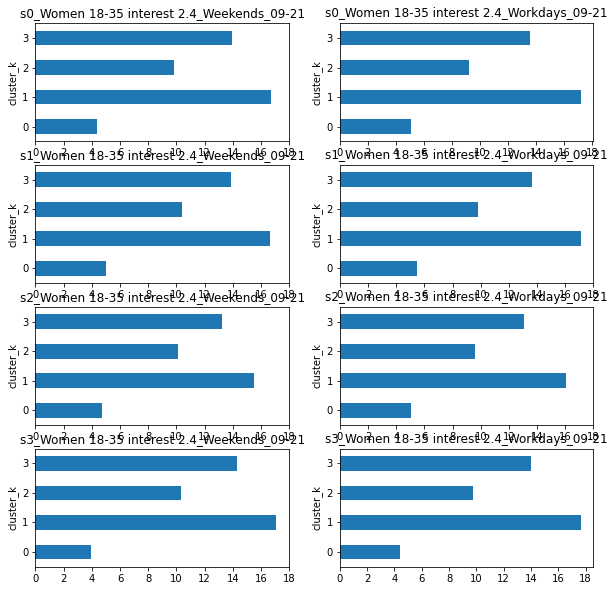

In [329]:
for s in cols_int:
#     print(s)
    fig, axs=plt.subplots(4,2, figsize=(10,10))
    n=0
    j=0
    for k in df_normal[[ i for i in int_cols if s in i ]].columns.unique():
        df_normal[df_normal['cluster_k']<4].groupby('cluster_k')[k].mean().plot(kind='barh', ax=axs[n,j])
        axs[n,j].set_title(k, size=12)
        axs[n,j].set_xticks( np.arange(0,20,2))
        if j==1:
            n+=1
            j=0
        else:
            j+=1

In [ ]:
for k in df_normal[[ i for i in int_cols if s in i ]].columns.unique():
    df_normal[df_normal['cluster_k']<4].groupby('cluster_k')[k].mean().plot(kind='barh', ax=axs[n,j])

In [667]:
df_normal[df_normal['cluster_k']<4].groupby('cluster_k')[int_cols].mean().rank(ascending=True).T#.to_csv('cluster_desc.csv')

cluster_k,0,1,2,3
s0_Active youth interest 2.4_Weekends_09-21,1.0,2.0,4.0,3.0
s0_Active youth interest 2.4_Workdays_09-21,1.0,2.0,4.0,3.0
s0_Families interest 2.4_Weekends_09-21,1.0,2.0,4.0,3.0
s0_Families interest 2.4_Workdays_09-21,1.0,2.0,4.0,3.0
s0_Fast food interest 2.4_Weekends_09-21,1.0,2.0,4.0,3.0
...,...,...,...,...
s3_Sport and fitness interest 2.4_Workdays_09-21,1.0,2.0,3.0,4.0
s3_Travellers interest 2.4_Weekends_09-21,1.0,2.0,4.0,3.0
s3_Travellers interest 2.4_Workdays_09-21,1.0,2.0,4.0,3.0
s3_Women 18-35 interest 2.4_Weekends_09-21,1.0,2.0,4.0,3.0


In [668]:
df_normal[df_normal['cluster_k']<4].groupby('cluster_k')[int_cols].mean().T.to_csv('cluster_desc1.csv')

In [343]:
# описание в excel

In [346]:
df_normal[df_normal['cluster_k']<4].groupby('cluster_k')[[ i for i in df_normal.columns if i not in int_cols]].mean().T.to_csv('cluster_desc1_users.csv')

Text(0.5, 1.0, 'Clusters formed by people behavior')

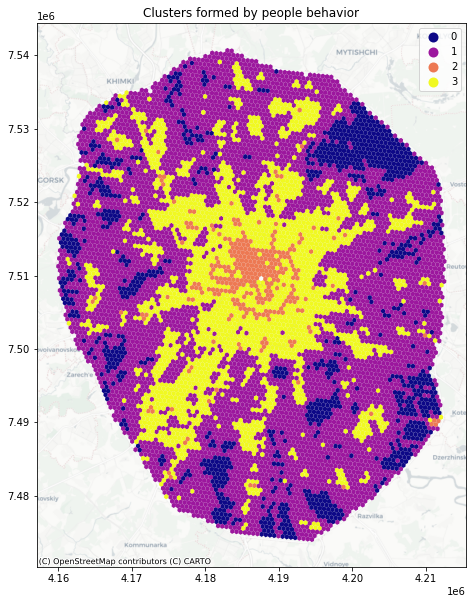

In [656]:
fig, ax=plt.subplots( figsize=(10,10))
gdf_normal[gdf_normal['cluster_k_st']!='4'].to_crs('epsg:3857').plot(column='cluster_k_st', ax=ax,figsize=(15,12), legend=True, cmap='plasma' )
ctx.add_basemap(ax, url=ctx.providers.CartoDB.Positron)
plt.title('Clusters formed by people behavior')

## 2-ая часть магазины

In [347]:
df_loco_full=pd.read_csv('df_loco_full.csv')

In [349]:
df_loco_full=df_loco_full[['HEX GID', 'Month',  'index', 'name_y', 'long_y', 'lat_y',
       'mus_node_y', 'geometry_mus_15m', 'geometry', 'Workers/Residents',
       'hex_buffer', 'hex_buffer1000', 'intersect', 'links', 'link_node ratio',
       'sum', 'connected_node_ratio']]

In [4]:
df_shop=pd.read_csv(open('.\data-28509-2020-04-15.csv'))

In [65]:
def convert_df_gdf(df):
    try:
        df['geometry']=df.geoData.apply(lambda s: shape({'type':'Point','coordinates':[float(s[26:-2].split(',')[0]),float(s[26:-2].split(',')[1])]}))
    except:
        df['geometry']=df.geoData.apply(lambda s: shape({'type':'Point','coordinates':[float(s[19:-21].split(' , ')[0]),float(s[19:-21].split(' , ')[1])]}))
  
#     df_new=df[['global_id','geometry']].copy()
#     df_new['Caption']=caption
    return gpd.GeoDataFrame(df, geometry='geometry', crs='epsg:4326')

In [ ]:
gdf_shop=convert_df_gdf(df_shop)

In [221]:
gdf_shop['lat']=gdf_shop.geometry.y
gdf_shop['long']=gdf_shop.geometry.x

In [400]:
gdf_joined=gpd.sjoin(gdf_normal[['hex_buffer','HEX Lat','HEX Long','cluster_k','HEX GID']], gdf_shop, op='contains', how='left')

Cluster: 0
Titles


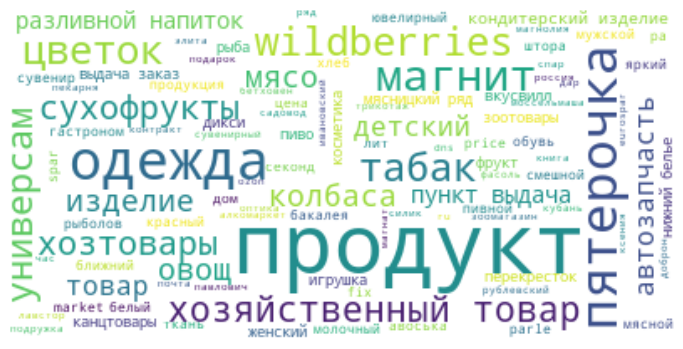

In [208]:
k=0
wc = wordcloud.WordCloud(max_font_size=50, max_words=100, background_color="white").generate(prep_cl0)
print('Cluster: {}'.format(k))
print('Titles')
# titles=wiki_cl[wiki_cl.cluster==k]['title']         
# print(titles.to_string(index=False))
plt.figure( figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

Cluster: 1
Titles


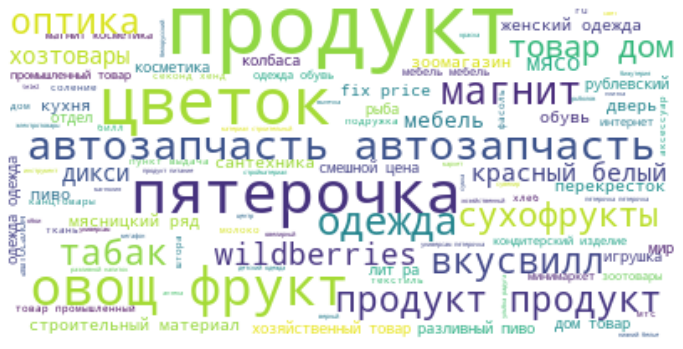

In [201]:
k=1
wc = wordcloud.WordCloud(max_font_size=50, max_words=100, background_color="white").generate(prep_cl1)
print('Cluster: {}'.format(k))
print('Titles')
# titles=wiki_cl[wiki_cl.cluster==k]['title']         
# print(titles.to_string(index=False))
plt.figure( figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

Cluster: 2
Titles


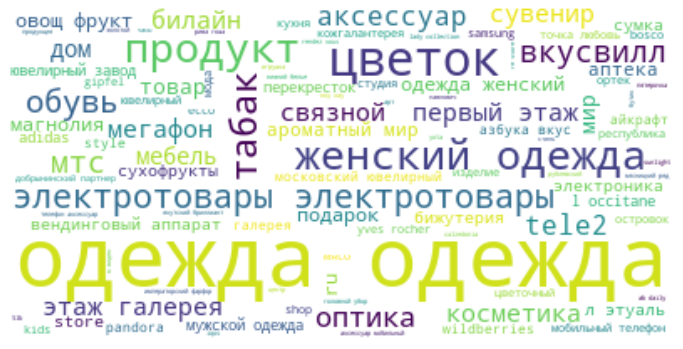

In [203]:
k=2
wc = wordcloud.WordCloud(max_font_size=50, max_words=100, background_color="white").generate(prep_cl2)
print('Cluster: {}'.format(k))
print('Titles')
# titles=wiki_cl[wiki_cl.cluster==k]['title']         
# print(titles.to_string(index=False))
plt.figure( figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

Cluster: 3
Titles


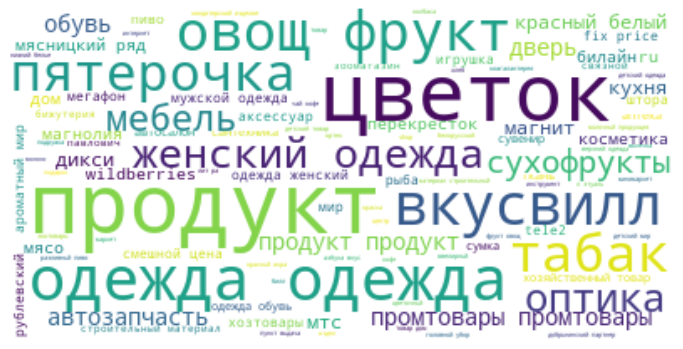

In [207]:
k=3
wc = wordcloud.WordCloud(max_font_size=50, max_words=100, background_color="white").generate(prep_cl3)
print('Cluster: {}'.format(k))
print('Titles')
# titles=wiki_cl[wiki_cl.cluster==k]['title']         
# print(titles.to_string(index=False))
plt.figure( figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# gdf_joined=gpd.sjoin(gdf_shop, gdf_normal[['1km_buffer'.'hex_buffer','HEX Lat','HEX Long','cluster_k','HEX GID']], op='within')

In [568]:
gdf_normal['1km_buffer']=gdf_normal.to_crs('epsg:3857').geometry.buffer(1000)

In [569]:
gdf_joined1=gpd.sjoin(gdf_normal.set_geometry('1km_buffer')[['1km_buffer','hex_buffer','HEX Lat','HEX Long','cluster_k','HEX GID']].to_crs('epsg:4326'),gdf_shop, op='contains', how='left')

In [571]:
gdf_joined1['HEX GID'].nunique()

8723

In [266]:
from pymystem3 import Mystem
# from string import punctuation
from nltk.corpus import stopwords
#Create lemmatizer and stopwords list
mystem = Mystem() 
russian_stopwords = stopwords.words("russian")
punctuation = ['"',',','.','»','«','(',')','{','}','[']

In [258]:
def preprocess_text(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in russian_stopwords\
              and token not in ['магазин','лавка','салон', 'супермаркет'] \
              and token != " " \
              and token.strip() not in punctuation]
    
    text_new = " ".join(tokens)
    
    return text_new

In [573]:
len(gdf_joined1['HEX GID'].unique())

8723

In [577]:
# считается около 2 часов
dic_prep=dict()
for i,he in enumerate(add_keys):
    text = ' '.join(gdf_joined1[gdf_joined1['HEX GID'] == he]['Name'])
    dic_prep[he] = 'пусто'
    if i%100 ==0 :
        print (i/8723)

0.0
0.14792899408284024
0.2958579881656805
0.4437869822485207
0.591715976331361
0.7396449704142012
0.8875739644970414


In [623]:
count_vectorizer = CountVectorizer(max_df=100000, min_df=1, vocabulary=None, decode_error='ignore', stop_words=['предприятие','store'], ngram_range = (1,2))  # stop_words='english, max_features=N_FEATURES 

clust_text=[v for k,v in dic_prep.items()]
cvec = count_vectorizer.fit(clust_text)
print (cvec)


CountVectorizer(analyzer='word', binary=False, decode_error='ignore',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=100000, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None,
                stop_words=['предприятие', 'store'], strip_accents=None,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None,
                vocabulary=None)


In [624]:
feature_names = cvec.get_feature_names()
print ( feature_names[:20])

['01', '01 dzintary', '01 milky', '01 visionnaire', '01 автозапчасть', '01 вкусвилл', '01 дверь', '01 продукт', '02', '02 красивый', '03', '03 03', '03 димакс', '08', '08 швейный', '09', '09 11', '10', '10 3136', '10 балл']


In [670]:
bag_of_words = cvec.transform(clust_text)
df_bag_of_words = pd.DataFrame(bag_of_words.todense(), columns=feature_names)
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(bag_of_words )

word_cnts = df_bag_of_words.sum(axis=0)
df_cnts = word_cnts.sort_values(ascending=False)
df_cnts = pd.DataFrame(df_cnts).reset_index()
df_cnts.columns = ['word','count']

weights = np.asarray(tfidf.mean(axis=0)).ravel().tolist()
df_weights = pd.DataFrame({'word': feature_names, 'weight': weights})
df_weights = df_weights.sort_values('weight', ascending=False)

df_weights = df_weights.merge(df_cnts, on='word', how='left')
df_weights = df_weights[['word', 'count', 'weight']]


cos_sim = cosine_similarity(tfidf, tfidf)
samp_dist = 1 - cos_sim
df_tfidf = pd.DataFrame(tfidf.todense(), columns=feature_names)
df_tfidf.shape

In [ ]:
# s_word_freq = pd.Series(df_weights['count'])
# s_word_freq.index = df_weights['word']
# di_word_freq = s_word_freq.to_dict()


In [588]:
pca_tfidf=PCA(n_components=3)

In [589]:
df_tf_pca=pca_tfidf.fit_transform(df_tfidf)

In [590]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_tf_pca)
    distortions.append(kmeanModel.inertia_)

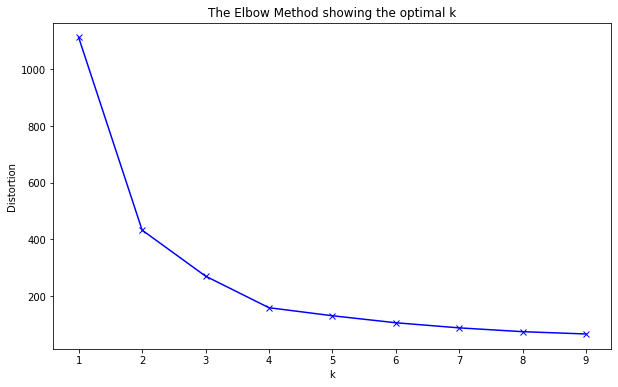

In [591]:
plt.figure(figsize=(10,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [593]:
n=4
kmeans_tf = KMeans(n_clusters=n,random_state= 10)
# Use fit_predict to cluster the dataset
predictions = kmeans_tf.fit_predict(df_tf_pca)
# Calculate cluster validation metrics
score_kemans_s = silhouette_score(df_tf_pca, kmeans_tf.labels_, metric='euclidean')
# score_kemans_c = calinski_harabasz_score(df_tf_pca, df_tf_pca.labels_)
score_kemans_d = davies_bouldin_score(df_tf_pca, predictions)
print('Silhouette Score: %.4f' % score_kemans_s)
# print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)

Silhouette Score: 0.4736
Davies Bouldin Score: 0.6539


In [597]:
df_clust=pd.DataFrame(pd.Series(dict(zip(dic_prep.keys(), predictions)))).reset_index()
df_clust.columns=['HEX GID','cluster']

In [598]:
df_clust['cluster'].value_counts()

0    3968
2    2551
3    1528
1     676
Name: cluster, dtype: int64

In [616]:
gdf_normal=gdf_normal.merge(df_clust, on='HEX GID')

In [617]:
gdf_normal['cluster_label']=gdf_normal['cluster'].astype(str)

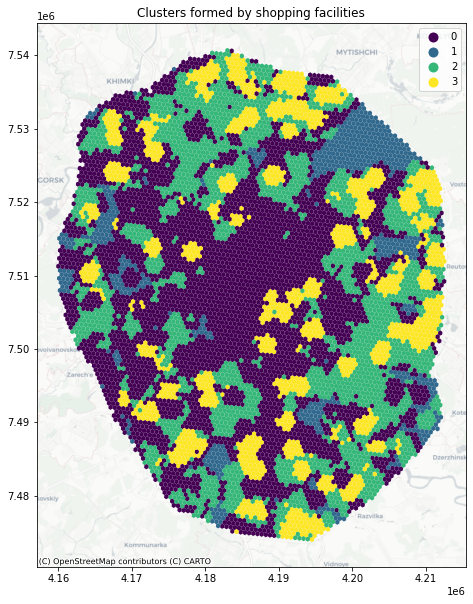

In [682]:
fig, ax=plt.subplots( figsize=(15,10))
gdf_normal.to_crs('epsg:3857').plot(column ='cluster_label', ax=ax, cmap='viridis',legend=True);
ctx.add_basemap(ax, url=ctx.providers.CartoDB.Positron)
plt.title('Clusters formed by shopping facilities');

Cluster: 0
Titles


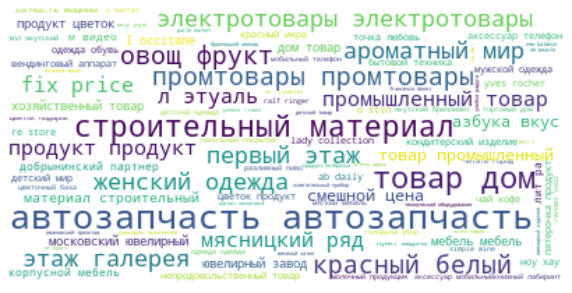

In [619]:
words_cl1=' '.join([dic_prep[i] for i in df_clust[df_clust['cluster']==0]['HEX GID']])
k=0
wc = wordcloud.WordCloud(max_font_size=50, max_words=100, background_color="white").generate(words_cl1)
print('Cluster: {}'.format(k))
print('Titles')
# titles=wiki_cl[wiki_cl.cluster==k]['title']         
# print(titles.to_string(index=False))
plt.figure( figsize=(10,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

Cluster: 1
Titles


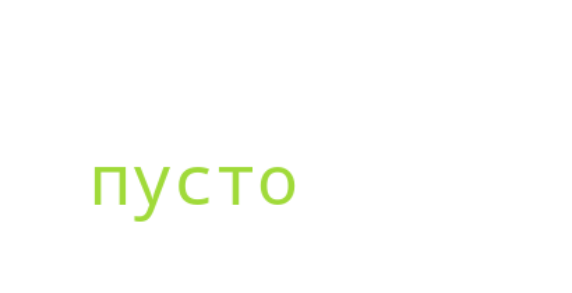

In [620]:
words_cl1=' '.join([dic_prep[i] for i in df_clust[df_clust['cluster']==1]['HEX GID']])

k=1
wc = wordcloud.WordCloud(max_font_size=50, max_words=100, background_color="white").generate(words_cl1)
print('Cluster: {}'.format(k))
print('Titles')
# titles=wiki_cl[wiki_cl.cluster==k]['title']         
# print(titles.to_string(index=False))
plt.figure( figsize=(10,7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

Cluster: 2


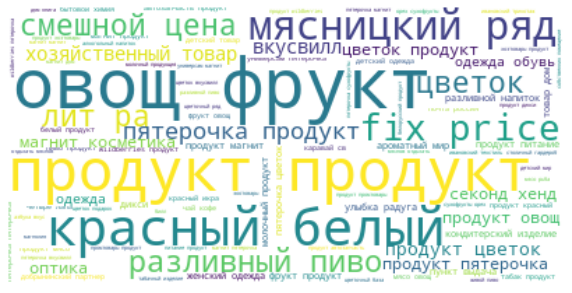

In [621]:
words_cl1=' '.join([v for i,v in enumerate(clust_text) if i in df_clust[df_clust['cluster']==2].index.to_list()])

k=2
wc = wordcloud.WordCloud(max_font_size=50, max_words=100, background_color="white").generate(words_cl1)
print('Cluster: {}'.format(k))
# print('Titles')
# titles=wiki_cl[wiki_cl.cluster==k]['title']         
# print(titles.to_string(index=False))
plt.figure( figsize=(10,7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

Cluster: 3
Titles


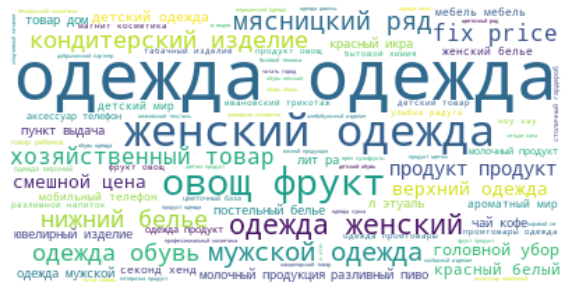

In [622]:
words_cl1=' '.join([v for i,v in enumerate(clust_text) if i in df_clust[df_clust['cluster']==3].index.to_list()])

k=3
wc = wordcloud.WordCloud(max_font_size=50, max_words=100, background_color="white").generate(words_cl1)
print('Cluster: {}'.format(k))
print('Titles')
# titles=wiki_cl[wiki_cl.cluster==k]['title']         
# print(titles.to_string(index=False))
plt.figure( figsize=(10,7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [635]:
gdf_normal.columns

Index(['HEX GID', 's0_Active youth interest 2.4_Weekends_09-21',
       's0_Active youth interest 2.4_Workdays_09-21',
       's0_Families interest 2.4_Weekends_09-21',
       's0_Families interest 2.4_Workdays_09-21',
       's0_Fast food interest 2.4_Weekends_09-21',
       's0_Fast food interest 2.4_Workdays_09-21',
       's0_Hardworkers interest 2.4_Weekends_09-21',
       's0_Hardworkers interest 2.4_Workdays_09-21',
       's0_Healthy lifestile interest 2.4_Weekends_09-21',
       ...
       's3_Workers_Weekends_09-21', 's3_Workers_Workdays_09-21', 'HEX Lat',
       'HEX Long', 'cluster_k', 'hex_buffer', 'cluster_k_st', '1km_buffer',
       'cluster', 'cluster_label'],
      dtype='object', length=137)

In [637]:
gdf_normal.rename(columns={'cluster_k':'cluster_people','cluster':'cluster_shops'}, inplace=True)

In [677]:
dic_shop_group={0:'разнообразие', 1:'пусто', 2:'продукты',3:'одежда'}

1


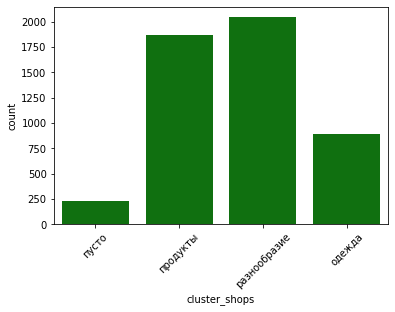

0


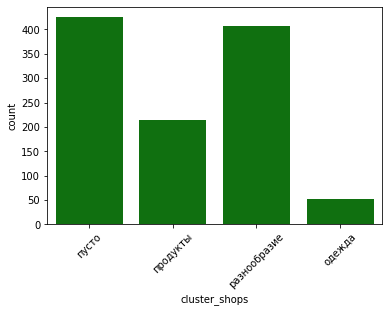

3


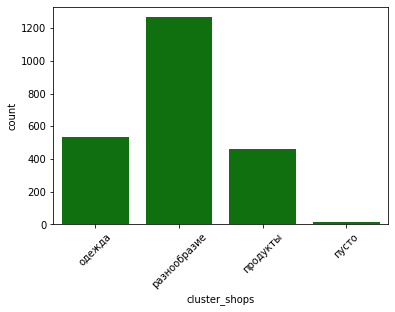

2


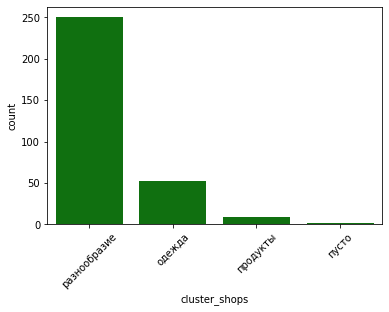

In [678]:
for c in gdf_normal['cluster_people'].unique()[:4]:
    print(c)
    sns.countplot(gdf_normal[gdf_normal['cluster_people']==c]['cluster_shops'].map(dic_shop_group), color='green')
    plt.xticks(rotation=45)
    plt.show()

пусто


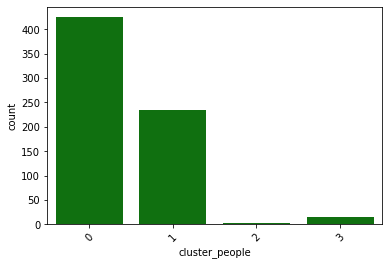

продукты


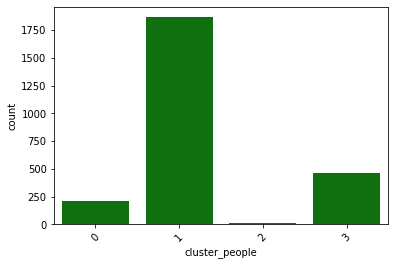

разнообразие


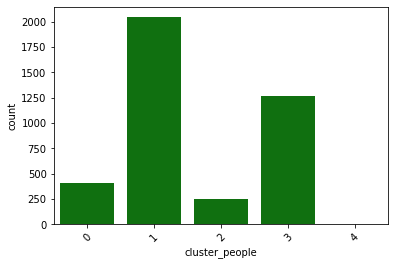

одежда


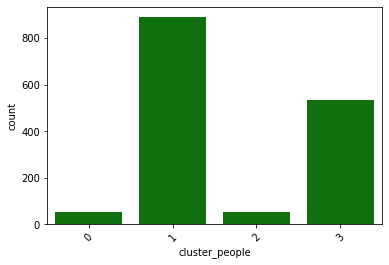

In [679]:
for c in gdf_normal['cluster_shops'].unique():
    print(dic_shop_group[c])
    sns.countplot(gdf_normal[gdf_normal['cluster_shops']==c]['cluster_people'], color='green')
    plt.xticks(rotation=45)
    plt.show()

In [673]:
gdf_normal.head()

,HEX GID,s0_Active youth interest 2.4_Weekends_09-21,s0_Active youth interest 2.4_Workdays_09-21,s0_Families interest 2.4_Weekends_09-21,s0_Families interest 2.4_Workdays_09-21,s0_Fast food interest 2.4_Weekends_09-21,s0_Fast food interest 2.4_Workdays_09-21,s0_Hardworkers interest 2.4_Weekends_09-21,s0_Hardworkers interest 2.4_Workdays_09-21,s0_Healthy lifestile interest 2.4_Weekends_09-21,...,s3_Workers_Weekends_09-21,s3_Workers_Workdays_09-21,HEX Lat,HEX Long,cluster_people,hex_buffer,cluster_k_st,1km_buffer,cluster_shops,cluster_label
0,891181b4183ffff,9.231798,8.687452,10.844546,10.376645,12.165695,12.031786,6.910711,6.559234,6.018908,...,0.0,0.0,55.585938,37.710978,1,"POLYGON ((37.70823 55.58518, 37.71061 55.58412...",1,"POLYGON ((4196667.201 7476391.025, 4196708.556...",1,1
1,891181b4187ffff,3.806555,4.259855,7.386098,8.704605,4.554173,6.728690,5.257044,1.518989,2.845223,...,0.0,0.0,55.588512,37.714101,0,"POLYGON ((37.71135 55.58775, 37.71373 55.58670...",0,"POLYGON ((4197014.860 7476898.052, 4197056.234...",1,1
2,891181b4193ffff,6.965970,5.034297,5.553501,7.631014,4.911782,7.076999,15.197724,6.849961,4.028486,...,0.0,0.0,55.586240,37.705847,0,"POLYGON ((37.70310 55.58548, 37.70548 55.58442...",0,"POLYGON ((4196096.005 7476450.497, 4196137.334...",2,2
3,891181b4197ffff,5.311990,2.617954,7.437264,3.209709,6.026788,2.899028,6.144599,2.692195,3.841686,...,0.0,0.0,55.588814,37.708970,0,"POLYGON ((37.70622 55.58806, 37.70860 55.58700...",0,"POLYGON ((4196443.617 7476957.544, 4196484.964...",1,1
4,891181b41a3ffff,8.148081,7.578621,11.197036,11.364495,11.867558,12.578100,6.803656,5.427340,5.329739,...,0.0,0.0,55.590783,37.722357,1,"POLYGON ((37.71961 55.59003, 37.72199 55.58897...",1,"POLYGON ((4197933.878 7477345.552, 4197975.298...",2,2


In [676]:
gdf_normal.groupby(['cluster_shops']).mean()

,s0_Active youth interest 2.4_Weekends_09-21,s0_Active youth interest 2.4_Workdays_09-21,s0_Families interest 2.4_Weekends_09-21,s0_Families interest 2.4_Workdays_09-21,s0_Fast food interest 2.4_Weekends_09-21,s0_Fast food interest 2.4_Workdays_09-21,s0_Hardworkers interest 2.4_Weekends_09-21,s0_Hardworkers interest 2.4_Workdays_09-21,s0_Healthy lifestile interest 2.4_Weekends_09-21,s0_Healthy lifestile interest 2.4_Workdays_09-21,...,s3_Users_Workdays_09-21,s3_Visitors_Weekends_09-21,s3_Visitors_Workdays_09-21,s3_Women 18-35 interest 2.4_Weekends_09-21,s3_Women 18-35 interest 2.4_Workdays_09-21,s3_Workers_Weekends_09-21,s3_Workers_Workdays_09-21,HEX Lat,HEX Long,cluster_people
cluster_shops,,,,,,,,,,,,,,,,,,,,,
0,9.663974,9.464797,10.265293,10.243687,9.227117,9.025393,7.549971,7.214134,6.048536,5.899197,...,103.378948,19.969758,49.304435,11.470544,11.225167,1.992524,2.137013,55.740112,37.584713,1.599042
1,4.446399,5.414834,5.045299,5.956973,3.920456,4.656065,3.373457,3.785202,2.760297,3.316370,...,8.097140,3.253945,4.782051,5.083145,5.155143,0.072485,0.074458,55.765081,37.656891,0.415680
2,8.173784,7.886235,11.016691,11.032408,7.862837,7.427338,5.881264,5.246830,5.478772,5.234705,...,54.998693,10.159937,24.880308,10.078399,9.537782,1.582517,1.641186,55.743660,37.626188,1.281850
3,9.041774,8.706140,11.577003,11.549899,10.210403,9.966856,6.336117,5.886879,6.130594,5.913406,...,95.181719,18.680846,45.544503,11.659554,11.229619,2.103621,2.193281,55.749712,37.645721,1.698953
